# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from random import uniform
from citipy import citipy
from datetime import datetime
import seaborn as sns
import urllib
from urllib.error import HTTPError
from datetime import datetime



# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat = []
lng = []
cloudiness = []
dt = []
temp = []
humidity = []
wind = []
country = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
api_key

'9be9daa77944427737375d79428d57be'

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

In [6]:
print("Beginning Data Retrival")
print("------------------------------")
i = 1
j = 1
weather_df = {"City":[],"Cloudiness":[],"Country":[],"Date":[],"Humidity":[],"Lat":[],"Lng":[],"Max Temp":[],"Wind Speed": []}
for city in cities:
    response = requests.get(query_url + city)
    response_json = response.json()
    
    if response.status_code == 200:
        weather_df["City"].append(city)
        weather_df["Cloudiness"].append(response_json['clouds']['all'])
        weather_df["Country"].append(response_json['sys']['country'])
        weather_df["Date"].append(response_json['dt'])
        weather_df["Humidity"].append(response_json['main']['humidity'])
        weather_df["Lat"].append(response_json['coord']['lat'])
        weather_df["Lng"].append(response_json['coord']['lon'])
        weather_df["Max Temp"].append(response_json['main']['temp_max'])
        weather_df["Wind Speed"].append(response_json['wind']['speed'])
        if j <= 50:
            print(f"Processing Record {j} of Set {i} | {city}")
            j = j + 1 
        else:
            j = 0
            i = i + 1
            print(f"Processing Record {j} of Set {i} | {city}")
            j = j + 1
        print("City not found. Skipping...")
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")


Beginning Data Retrival
------------------------------
Processing Record 1 of Set 1 | rocha
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 3 of Set 1 | cape town
City not found. Skipping...
Processing Record 4 of Set 1 | lebu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
City not found. Skipping...
Processing Record 6 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 7 of Set 1 | ocos
City not found. Skipping...
Processing Record 8 of Set 1 | bluff
City not found. Skipping...
Processing Record 9 of Set 1 | touros
City not found. Skipping...
Processing Record 10 of Set 1 | hami
City not found. Skipping...
Processing Record 11 of Set 1 | tuatapere
City not found. Skipping...
Processing Record 12 of Set 1 | hasaki
City not found. Skipping...
Processing Record 13 of Set 1 | talnakh
City not found. Skipping...
Processing Record 14 of Set 1 | thompson
City not found. Skipping...
Processing

Processing Record 18 of Set 3 | kabo
City not found. Skipping...
Processing Record 19 of Set 3 | upernavik
City not found. Skipping...
Processing Record 20 of Set 3 | sorland
City not found. Skipping...
Processing Record 21 of Set 3 | nikolskoye
City not found. Skipping...
Processing Record 22 of Set 3 | narsaq
City not found. Skipping...
Processing Record 23 of Set 3 | jamestown
City not found. Skipping...
Processing Record 24 of Set 3 | umm lajj
City not found. Skipping...
Processing Record 25 of Set 3 | konya
City not found. Skipping...
Processing Record 26 of Set 3 | marmande
City not found. Skipping...
Processing Record 27 of Set 3 | bastrop
City not found. Skipping...
Processing Record 28 of Set 3 | broken hill
City not found. Skipping...
Processing Record 29 of Set 3 | ketchikan
City not found. Skipping...
Processing Record 30 of Set 3 | saskylakh
City not found. Skipping...
Processing Record 31 of Set 3 | porto nacional
City not found. Skipping...
Processing Record 32 of Set 3 

Processing Record 35 of Set 5 | bela
City not found. Skipping...
Processing Record 36 of Set 5 | kingston
City not found. Skipping...
Processing Record 37 of Set 5 | ankang
City not found. Skipping...
Processing Record 38 of Set 5 | yulara
City not found. Skipping...
Processing Record 39 of Set 5 | esperance
City not found. Skipping...
Processing Record 40 of Set 5 | jijiga
City not found. Skipping...
Processing Record 41 of Set 5 | bowen
City not found. Skipping...
Processing Record 42 of Set 5 | lake havasu city
City not found. Skipping...
Processing Record 43 of Set 5 | makasar
City not found. Skipping...
Processing Record 44 of Set 5 | iwaki
City not found. Skipping...
Processing Record 45 of Set 5 | tobol
City not found. Skipping...
Processing Record 46 of Set 5 | arkhangelsk
City not found. Skipping...
Processing Record 47 of Set 5 | hillsborough
City not found. Skipping...
Processing Record 48 of Set 5 | fort nelson
City not found. Skipping...
Processing Record 49 of Set 5 | coq

Processing Record 0 of Set 8 | banda aceh
City not found. Skipping...
Processing Record 1 of Set 8 | port hedland
City not found. Skipping...
Processing Record 2 of Set 8 | lucapa
City not found. Skipping...
Processing Record 3 of Set 8 | ambanja
City not found. Skipping...
Processing Record 4 of Set 8 | manicore
City not found. Skipping...
Processing Record 5 of Set 8 | port blair
City not found. Skipping...
Processing Record 6 of Set 8 | beldanga
City not found. Skipping...
Processing Record 7 of Set 8 | george town
City not found. Skipping...
Processing Record 8 of Set 8 | benguela
City not found. Skipping...
Processing Record 9 of Set 8 | tiznit
City not found. Skipping...
Processing Record 10 of Set 8 | kaitangata
City not found. Skipping...
Processing Record 11 of Set 8 | ejura
City not found. Skipping...
Processing Record 12 of Set 8 | millington
City not found. Skipping...
Processing Record 13 of Set 8 | kindberg
City not found. Skipping...
Processing Record 14 of Set 8 | pimen

Processing Record 18 of Set 10 | oudtshoorn
City not found. Skipping...
Processing Record 19 of Set 10 | san cristobal
City not found. Skipping...
Processing Record 20 of Set 10 | dawei
City not found. Skipping...
Processing Record 21 of Set 10 | dillon
City not found. Skipping...
Processing Record 22 of Set 10 | shache
City not found. Skipping...
Processing Record 23 of Set 10 | kisangani
City not found. Skipping...
Processing Record 24 of Set 10 | kuruman
City not found. Skipping...
Processing Record 25 of Set 10 | kyshtovka
City not found. Skipping...
Processing Record 26 of Set 10 | tomatlan
City not found. Skipping...
Processing Record 27 of Set 10 | dosso
City not found. Skipping...
Processing Record 28 of Set 10 | suarez
City not found. Skipping...
Processing Record 29 of Set 10 | tabou
City not found. Skipping...
Processing Record 30 of Set 10 | hukuntsi
City not found. Skipping...
Processing Record 31 of Set 10 | sideropolis
City not found. Skipping...
Processing Record 32 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_df = pd.DataFrame(weather_df)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rocha,87,UY,1558534769,73,-34.48,-54.34,62.05,10.22
1,ushuaia,75,AR,1558534769,86,-54.81,-68.31,41.00,11.41
2,cape town,40,ZA,1558534509,56,-33.93,18.42,68.00,9.17
3,lebu,100,ET,1558534770,75,8.96,38.73,64.57,5.26
4,hilo,90,US,1558534771,78,19.71,-155.08,73.40,5.82


In [10]:
weather_df.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

In [11]:
# convert data to csv
weather_df.to_csv('weather_df.csv', encoding='utf-8', index=False)

In [11]:
weather_df.shape

(564, 9)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

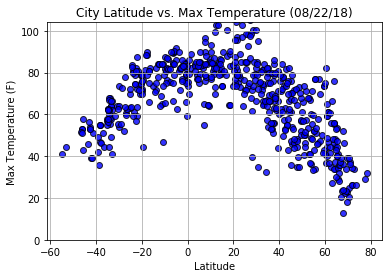

In [12]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], marker="o", alpha=0.8, edgecolor="black", color='blue')
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(0,104)
plt.grid(True)

plt.savefig("LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

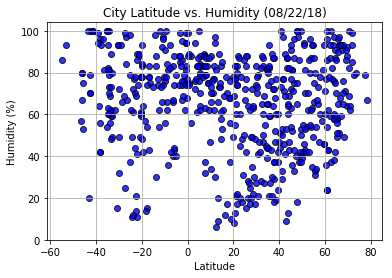

In [13]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"], marker="o", alpha=0.8, edgecolor="black", color='blue')
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,104)
plt.grid(True)

plt.savefig("LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

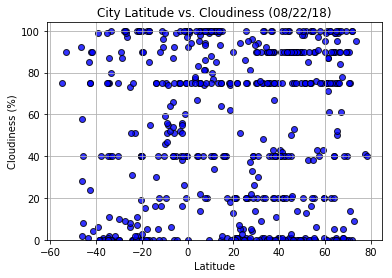

In [14]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], marker="o", alpha=0.8, edgecolor="black", color='blue')
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0,104)
plt.grid(True)

plt.savefig("LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

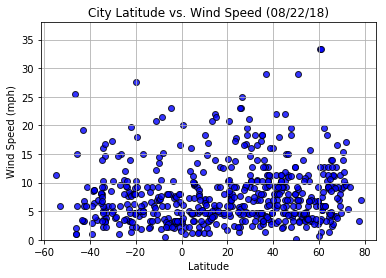

In [15]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], marker="o", alpha=0.8, edgecolor="black", color='blue')
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,38)
plt.grid(True)

plt.savefig("LatVsWindSpeed.png")
plt.show()